In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score
from tqdm import tqdm



In [2]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load dataset from provided file
complaints = pd.read_csv('/Users/sriramsuresh/Downloads/complaints_25Nov21.csv')

In [4]:
complaints

Date received                  Product                   Sub-product  \
0         2016-10-26          Money transfers  International money transfer   
1         2015-03-27  Bank account or service    Other bank product/service   
2         2015-04-20  Bank account or service    Other bank product/service   
3         2013-04-29                 Mortgage   Conventional fixed mortgage   
4         2013-05-29                 Mortgage                Other mortgage   
...              ...                      ...                           ...   
207255    2015-05-24          Debt collection                   Credit card   
207256    2012-01-10                 Mortgage   Conventional fixed mortgage   
207257    2012-07-17             Student loan      Non-federal student loan   
207258    2016-09-29  Bank account or service              Checking account   
207259    2015-04-29                 Mortgage   Conventional fixed mortgage   

                                           Issue  \
0                       Other transaction issues   
1        Account opening, closing, or management   
2       Making/receiving payments, sending money   
3       Application, originator, mortgage broker   
4       Loan modification,collection,foreclosure   
...                                          ...   
207255      Taking/threatening an illegal action   
207256  Loan modification,collection,foreclosure   
207257                        Repaying your loan   
207258   Account opening, closing, or management   
207259  Loan modification,collection,foreclosure   

                                   Sub-issue  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
207255  Sued w/o proper notification of suit   
207256                                   NaN   
207257                                   NaN   
207258                                   NaN   
207259                                   NaN   

                             Consumer complaint narrative  \
0       To whom it concerns, I would like to file a fo...   
1       My name is XXXX XXXX XXXX and huband name is X...   
2       XXXX 2015 : I called to make a payment on XXXX...   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
207255                                                NaN   
207256                                                NaN   
207257                                                NaN   
207258  Near the end of XXXX 2016 I opened a Citigold ...   
207259  My father died in XX/XX/XXXX. Left me his only...   

                                  Company public response  \
0       Company has responded to the consumer and the ...   
1        Company chooses not to provide a public response   
2        Company chooses not to provide a public response   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
207255                                                NaN   
207256                                                NaN   
207257                                                NaN   
207258  Company has responded to the consumer and the ...   
207259                                                NaN   

                                      Company State ZIP code            Tags  \
0                              CITIBANK, N.A.   NaN      NaN             NaN   
1                              CITIBANK, N.A.    PA    151XX  Older American   
2                                U.S. BANCORP    PA    152XX             NaN   
3                        JPMORGAN CHASE & CO.    VA    22406   Service

In [5]:
# How many rows and columns do we have?

complaints.shape

(207260, 18)

In [6]:
# What are the column names?

complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
# Let us look at which banks have the most number of complaints

complaints['Company'].value_counts().sort_values(ascending=False)

BANK OF AMERICA, NATIONAL ASSOCIATION    65440
WELLS FARGO & COMPANY                    53111
JPMORGAN CHASE & CO.                     42170
CITIBANK, N.A.                           34341
U.S. BANCORP                             12198
Name: Company, dtype: int64

In [8]:
# Let us get a feel for the data

complaints.head()

Date received                  Product                   Sub-product  \
0    2016-10-26          Money transfers  International money transfer   
1    2015-03-27  Bank account or service    Other bank product/service   
2    2015-04-20  Bank account or service    Other bank product/service   
3    2013-04-29                 Mortgage   Conventional fixed mortgage   
4    2013-05-29                 Mortgage                Other mortgage   

                                      Issue Sub-issue  \
0                  Other transaction issues       NaN   
1   Account opening, closing, or management       NaN   
2  Making/receiving payments, sending money       NaN   
3  Application, originator, mortgage broker       NaN   
4  Loan modification,collection,foreclosure       NaN   

                        Consumer complaint narrative  \
0  To whom it concerns, I would like to file a fo...   
1  My name is XXXX XXXX XXXX and huband name is X...   
2  XXXX 2015 : I called to make a payment on XXXX...   
3                                                NaN   
4                                                NaN   

                             Company public response  \
0  Company has responded to the consumer and the ...   
1   Company chooses not to provide a public response   
2   Company chooses not to provide a public response   
3                                                NaN   
4                                                NaN   

                                 Company State ZIP code            Tags  \
0                         CITIBANK, N.A.   NaN      NaN             NaN   
1                         CITIBANK, N.A.    PA    151XX  Older American   
2                           U.S. BANCORP    PA    152XX             NaN   
3                   JPMORGAN CHASE & CO.    VA    22406   Servicemember   
4  BANK OF AMERICA, NATIONAL ASSOCIATION    GA    30044             NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0           Consent provided           Web           2016-10-29   
1           Consent provided           Web           2015-03-27   
2           Consent provided           Web           2015-04-22   
3                        NaN         Phone           2013-04-30   
4                        NaN      Referral           2013-05-31   

  Company response to consumer Timely response? Consumer disputed?  \
0      Closed with explanation              Yes                 No   
1      Closed with explanation              Yes                 No   
2  Closed with monetary relief              Yes                 No   
3      Closed with explanation              Yes                Yes   
4      Closed with explanation              Yes                 No   

   Complaint ID  
0       2180490  
1       1305453  
2       1337613  
3        393900  
4        418647

In [9]:
complaints['Company response to consumer'].unique()

array(['Closed with explanation', 'Closed with monetary relief',
       'Closed with non-monetary relief', 'Closed without relief',
       'Closed', 'Closed with relief', 'Untimely response'], dtype=object)

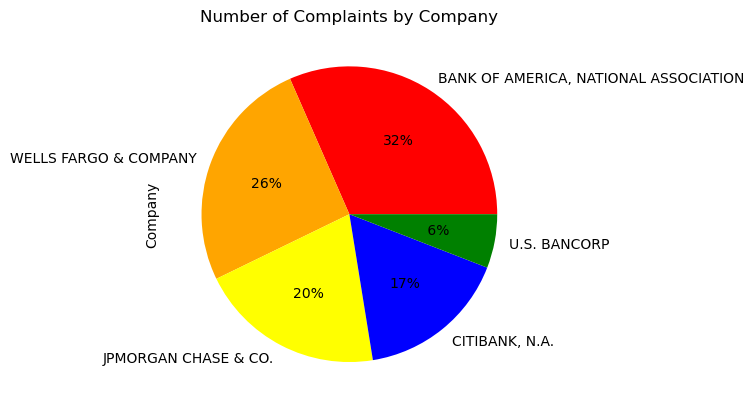

In [10]:
import matplotlib.pyplot as plt

# Generate a Pie  chart of the value counts of the 'Company' column
complaints['Company'].value_counts().plot(kind='pie', colors=['Red','orange','Yellow','blue','green'],autopct='%2.0f%%')

# Set the title and axis labels
plt.title('Number of Complaints by Company')




# Show the chart
plt.show()

In [11]:
# Let us see how many total disputes are there

complaints['Consumer disputed?'].value_counts().sum()

207260

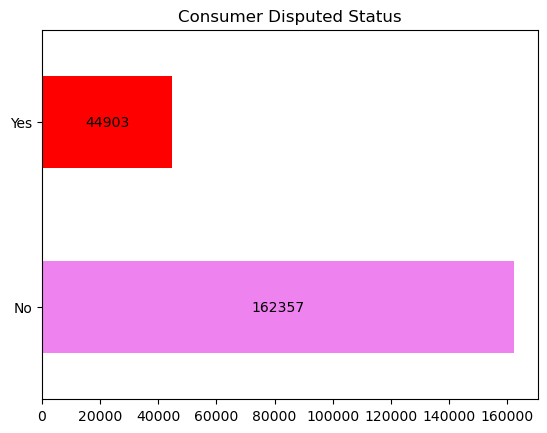

In [12]:
import matplotlib.pyplot as plt

# Generate a bar chart of the value counts of the 'Consumer disputed?' column
fig=complaints['Consumer disputed?'].value_counts().plot(kind='barh',stacked=True,legend=False,color=['violet','Red'])
fig.bar_label(fig.containers[0], label_type='center')


# Set the title
plt.title('Consumer Disputed Status')

# Show the chart
plt.show()

In [13]:
# In terms of a percentage

complaints['Consumer disputed?'].value_counts(normalize=True)

No     0.783349
Yes    0.216651
Name: Consumer disputed?, dtype: float64

Text(0.5, 1.0, 'Method of Submission and Disputes')

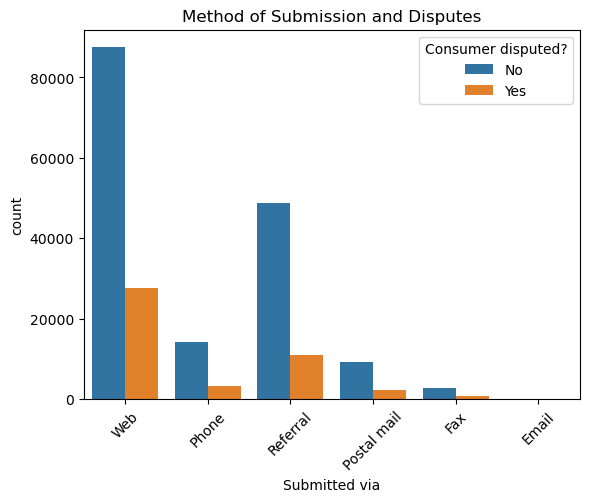

In [14]:
# Count of the Method of the complaint submitted 
ax = sns.countplot(x='Submitted via', data=complaints, hue='Consumer disputed?')
#plt.title('Cut vs color');
plt.xticks(rotation=45)
ax.set_title('Method of Submission and Disputes')

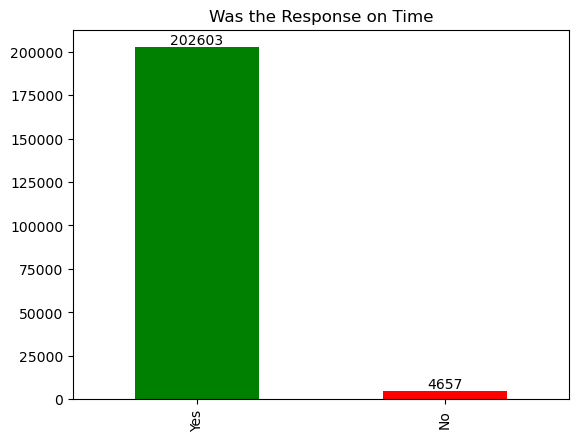

In [15]:
#Comparision based on whether the response was timely or not


import matplotlib.pyplot as plt

# Generate a bar chart of the value counts of the 'Consumer disputed?' column
fig=complaints['Timely response?'].value_counts().plot(kind='bar',stacked=True,legend=False,color=['Green','Red'])


fig.bar_label(fig.containers[0], label_type='edge')


# Set the title
plt.title('Was the Response on Time')

# Show the chart
plt.show()

{
   "Date received": "2016-10-26",
   "Product": "Money transfers",
   "Sub-product": "International money transfer",
   "Issue": "Other transaction issues",
   "Sub-issue": "",
   "Consumer complaint narrative": "To whom it concerns, I would like to file a formal complaint against Citi Prepaid Services, regarding an outbound manual money transfer made on XX/XX/2016. \n\nThe transfer was never delivered to my partners XXXX account with XXXX, and also was n't delivered to the intermediary bank, XXXX XXXX. \n\nWe have been told by Citi Prepaid that the transfer left our account and should have been received on XX/XX/2016. Over a month ago Citi Prepaid informed us it was being elevated to their own personal investigations department and that we would hear from them regarding the status of our investigation. \n\nDuring this time frame we have heard nothing aside from that it is being investigated. We have been given zero updates with no regard for any questions we have risen concerning th

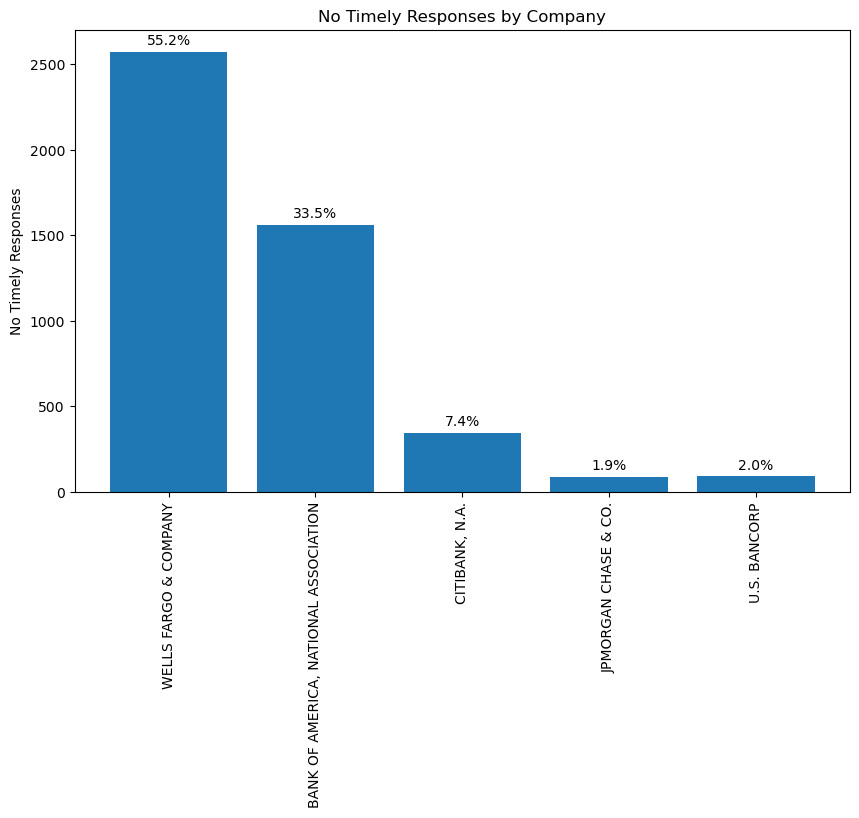

In [16]:
#Which Bank amongst has failed to resolve its complaints 



import matplotlib.pyplot as plt

import csv
import json

csv_file = '/Users/sriramsuresh/Downloads/complaints_25Nov21.csv'

with open(csv_file, mode='r') as file:
    reader = csv.DictReader(file)
    list_of_dicts = [row for row in reader]

print(json.dumps(list_of_dicts[0], indent=3))

from collections import defaultdict

company_count = defaultdict(int)

for entry in list_of_dicts:
    if entry['Timely response?'] == 'No':
        company_count[entry['Company']] += 1
# Data to plot
labels = list(company_count.keys())
sizes = list(company_count.values())

total_count = sum(sizes)
percentages = [(count / total_count) * 100 for count in sizes]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size if needed
bars = ax.bar(labels, sizes)

# Add labels and title
ax.set_ylabel('No Timely Responses')
ax.set_title('No Timely Responses by Company')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

# Annotate bars with percentages
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate(
        f"{percentages[i]:.1f}%",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

# Display the bar plot
plt.show()

In [17]:
#How many complaints were not adressed on time

complaints['Timely response?'].value_counts(normalize=True)

Yes    0.977531
No     0.022469
Name: Timely response?, dtype: float64

In [18]:
# Check for NaNs in the 'Consumer Disputed' column

complaints['Consumer disputed?'].isna().sum()

0

In [19]:
# Next, for cleanliness we change the column type for 'Consumer Disputed' from string to category
# We don't have to do this, but can't hurt just in case an algorithm we are trying needs this.

complaints['Consumer disputed?'] = complaints['Consumer disputed?'].astype('category')

In [20]:
X = complaints[[ 'Product', 'Sub-product', 'Issue', 'Sub-issue',
        'Company public response', 'Company',
       'State',  'Tags',
       'Submitted via',  'Company response to consumer',
       'Timely response?']]

In [21]:
# Let us check if we have any missing values in our reduced dataset X

print(len(X)) # Number of rows before dropna()
print(len(X.dropna())) # Number of rows after dropna() 

207260
581


In [22]:
# Check how many values are missing in each column

X.isna().sum()

Product                              0
Sub-product                      43015
Issue                                0
Sub-issue                       196913
Company public response         148802
Company                              0
State                             2194
Tags                            178995
Submitted via                        0
Company response to consumer         0
Timely response?                     0
dtype: int64

In [23]:
X['Sub-product'].unique()

array(['International money transfer', 'Other bank product/service',
       'Conventional fixed mortgage', 'Other mortgage',
       'Checking account', 'Vehicle lease', nan, 'Medical',
       'Conventional adjustable mortgage (ARM)', 'Vehicle loan',
       'Reverse mortgage', '(CD) Certificate of deposit', 'FHA mortgage',
       'Government benefit payment card', 'VA mortgage',
       'Savings account', 'Credit card',
       'Home equity loan or line of credit', 'Second mortgage',
       'Non-federal student loan', 'Installment loan',
       'Other special purpose card', 'Mortgage', 'I do not know',
       'Cashing a check without an account', 'Federal student loan',
       'Auto', 'Other (i.e. phone, health club, etc.)',
       'Personal line of credit', 'Domestic (US) money transfer',
       'General purpose card', 'Payday loan',
       'Traveler’s/Cashier’s checks', 'Refund anticipation check',
       'Federal student loan servicing', 'Debt settlement',
       'Gift or merchant card

In [24]:
X['Sub-issue'].unique()

array([nan, 'Debt is not mine', 'Not given enough info to verify debt',
       'Frequent or repeated calls', 'Account status',
       'Trouble with how payments are handled',
       'Talked to a third party about my debt', 'Debt was paid',
       'Attempted to/Collected exempt funds',
       'Right to dispute notice not received',
       'Debt was discharged in bankruptcy',
       'Seized/Attempted to seize property', 'Account terms',
       'Indicated committed crime not paying',
       'Having problems with customer service',
       'Threatened to sue on too old debt',
       'Contacted employer after asked not to',
       "Can't decrease my monthly payments",
       'Attempted to collect wrong amount',
       "Don't agree with fees charged",
       'Qualify for a better loan than offered',
       "Indicated shouldn't respond to lawsuit",
       'Received bad information about my loan',
       'Not disclosed as an attempt to collect',
       "Can't temporarily postpone payments",
   

In [25]:
X['State'].unique()

array([nan, 'PA', 'VA', 'GA', 'CA', 'MD', 'MN', 'WA', 'OK', 'TX', 'FL',
       'NJ', 'MA', 'WI', 'AZ', 'NY', 'DE', 'IL', 'CT', 'AE', 'MI', 'TN',
       'NH', 'MO', 'DC', 'OH', 'WV', 'NC', 'NM', 'AL', 'NV', 'UT', 'SC',
       'AK', 'KY', 'HI', 'OR', 'KS', 'CO', 'IN', 'ID', 'NE', 'VT', 'LA',
       'RI', 'WY', 'MS', 'ME', 'MT', 'IA', 'AR', 'PR', 'ND', 'SD', 'AS',
       'AP', 'GU', 'VI', 'MH', 'FM', 'AA', 'MP', 'PW'], dtype=object)

In [26]:
X['Company public response'].unique()

array(['Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company chooses not to provide a public response', nan,
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'Company believes complaint is the result of an isolated error',
       'Company believes complaint relates to a discontinued policy or procedure',
       'Company believes the complaint is the result of a misunderstanding'],
      dtype=object)

In [27]:
print(X['Tags'].unique())
X['Tags'].value_counts()

[nan 'Older American' 'Servicemember' 'Older American, Servicemember']


Older American                   18554
Servicemember                     7331
Older American, Servicemember     2380
Name: Tags, dtype: int64

In [28]:
#lets fill the null values with the string empty to make sure it does not create issues in model building
X = X.fillna('empty')
X.dropna().shape

(207260, 11)

In [29]:
# Next, we convert all the X observations into numbers

X = pd.get_dummies(X)


In [30]:
# Let us see what X looks like

print('X has the shape ',X.shape)

X

X has the shape  (207260, 306)


Product_Bank account or service  Product_Consumer Loan  \
0                                     0                      0   
1                                     1                      0   
2                                     1                      0   
3                                     0                      0   
4                                     0                      0   
...                                 ...                    ...   
207255                                0                      0   
207256                                0                      0   
207257                                0                      0   
207258                                1                      0   
207259                                0                      0   

        Product_Credit card  Product_Credit reporting  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
...                     ...                       ...   
207255                    0                         0   
207256                    0                         0   
207257                    0                         0   
207258                    0                         0   
207259                    0                         0   

        Product_Debt collection  Product_Money transfers  Product_Mortgage  \
0                             0                        1                 0   
1                             0                        0                 0   
2                             0                        0                 0   
3                             0                        0                 1   
4                             0                        0                 1   
...                         ...                      ...               ...   
207255                        1                        0                 0   
207256                        0                        0                 1   
207257                        0                        0                 0   
207258                        0                        0                 0   
207259                        0                        0                 1   

        Product_Other financial service  Product_Payday loan  \
0                                     0                    0   
1                                     0                    0   
2                                     0                    0   
3                                     0                    0   
4                                     0                    0   
...                                 ...                  ...   
207255                                0                    0   
207256                                0                    0   
207257                                0                    0   
207258                                0                    0   
207259                                0                    0   

        Product_Prepaid card  ...  Submitted via_Web  \
0                          0  ...                  1   
1                          0  ...                  1   
2                          0  ...                  1   
3                          0  ...                  0   
4                          0  ...                  0   
...                      ...  ...                ...   
207255                     0  ...                  1   
207256                     0  ...                  0   
207257                     0  ...                  1   
207258                     0  ...                  1   
207259                     0  ...                  1   

        Company response to consumer_Closed  \
0                                         0   
1                                         0   
2         

In [31]:
y = complaints['Consumer disputed?']

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(complaints['Consumer disputed?'])
print(le.classes_)
print(le.inverse_transform(list(set(y))))
labels = dict(zip(list(set(y)), le.inverse_transform(list(set(y)))))
print("\nLabel mapping is:", labels)

['No' 'Yes']
['No' 'Yes']

Label mapping is: {0: 'No', 1: 'Yes'}


In [33]:
# Let us now look at what y looks like
y

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# Let us do a value_counts() to check how many of each category.  But we have to convert to a Pandas dataframe first.
print(pd.DataFrame(y).value_counts(), '\n')
print(pd.DataFrame(y).value_counts(normalize=True))

0    162357
1     44903
dtype: int64 

0    0.783349
1    0.216651
dtype: float64


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# We check the shape of our X and y 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(165808, 306)
(165808,)
(41452, 306)
(41452,)


In [37]:
# Below is the code for oversampling with SMOTE.  It is time consuming to run, and did not provide me better results.  So I chose not to use this.  But you should do your own analysis and decide.

# %%time
# from imblearn.over_sampling import SMOTE 
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [38]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_train, y_train = undersampler.fit_resample(X, y)

In [39]:
# Let us check if the dataset is balanced
# just checking that the '1' category is exactly 50% of the training set

y_train.sum()/len(y_train) 

0.5

In [40]:
X_train.shape

(89806, 306)

In [41]:
# Let us look at what y_train looks like, and the value_counts()
pd.DataFrame(y_train).value_counts()

0    44903
1    44903
dtype: int64

In [42]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(207260, 306)
(89806, 306)
(41452, 306)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [44]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
pre= model.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.62      0.75     32460
           1       0.38      0.82      0.52      8992

    accuracy                           0.67     41452
   macro avg       0.65      0.72      0.63     41452
weighted avg       0.81      0.67      0.70     41452



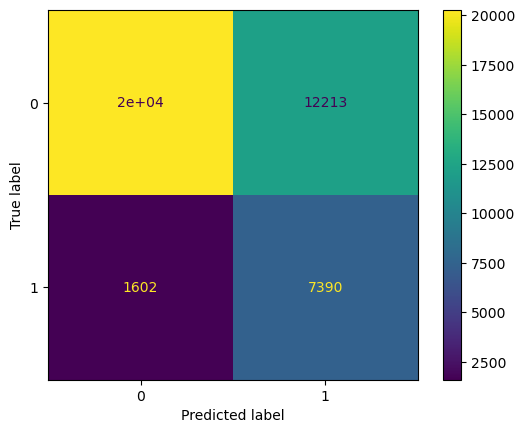

In [47]:


print(classification_report(y_true = y_test, y_pred = pre))

cm = confusion_matrix(y_test, pre)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [48]:
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pre))
print(classification_report(y_true=y_test, y_pred=pre))

Test accuracy =  0.6667229566727781
              precision    recall  f1-score   support

           0       0.93      0.62      0.75     32460
           1       0.38      0.82      0.52      8992

    accuracy                           0.67     41452
   macro avg       0.65      0.72      0.63     41452
weighted avg       0.81      0.67      0.70     41452



In [49]:
print("Label mapping is:", labels)

Label mapping is: {0: 'No', 1: 'Yes'}


In [50]:

True_NoDispute_Cost = 100 * cm[0, 0]


False_Dispute_Cost = 190 * cm[0,1]


False_NoDispute_Cost = 600 * cm[1,0]


True_Dispute_Cost = 190 * cm[1,1]

In [51]:
Total_cost = True_NoDispute_Cost + False_Dispute_Cost + False_NoDispute_Cost + True_Dispute_Cost
Total_cost

6710470

In [52]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [53]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
threshold = 0.1

In [55]:
pre_prob = model.predict(X_test)

In [56]:
pre = (pre_prob > threshold).astype(int)

100%|█████████████████████████████████████████| 100/100 [02:03<00:00,  1.24s/it]

CPU times: user 2min 2s, sys: 1.22 s, total: 2min 3s
Wall time: 2min 3s


<Axes: xlabel='threshold', ylabel='Total_cost'>

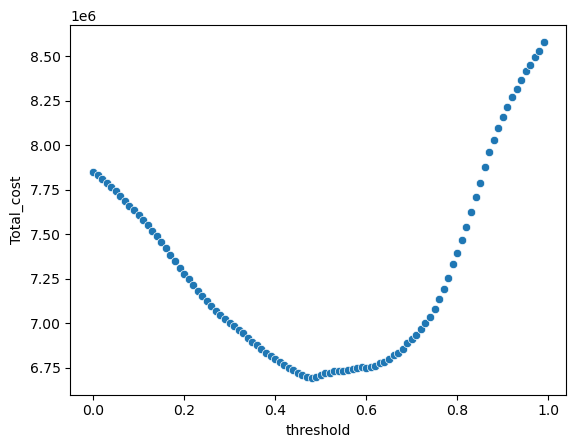

In [57]:
%%time
# Set threshold for identifying class 1
threshold = 0.0001
appended_data = []

for threshold in tqdm(np.arange(0,1,.01)):
    # Create predictions.  Note that predictions give us probabilities, not classes!
    pre_prob = model.predict_proba(X_test)

    # We drop the probabilities for class 0, and keep just the second column
    pre_prob = pre_prob[:,1]

    # Convert probabilities to 1s and 0s based on threshold
    pre = (pre_prob>threshold).astype(int)

    # confusion matrix
    cm = confusion_matrix(y_test, pre)
    
    # accuracy score of the model
    accuracy = accuracy_score(y_test, pre)
    precision = precision_score(y_test, pre,zero_division=0)
    recall = recall_score(y_test, pre)
    
    # Cost when model predicts dispute and actually disputed
    True_NoDispute_Cost = 100 * cm[0, 0]

    # Cost when model predicts dispute and no actual dispute 
    False_Dispute_Cost = 190 * cm[0,1]

    # Cost when model predicts NoDispute and actually disputed
    False_NoDispute_Cost = 600 * cm[1,0]

    # Cost when model predicts NoDispute correctly
    True_Dispute_Cost = 190 * cm[1,1]
    
    Total_cost = True_NoDispute_Cost + False_Dispute_Cost + False_NoDispute_Cost + True_Dispute_Cost
    Total_cost
    
    data = pd.DataFrame({'threshold':[threshold], 'accuracy': [accuracy], 
                         'precision':[precision], 'recall':[recall],
                         'True_NoDispute_Cost':[True_NoDispute_Cost], 
                         'False_Dispute_Cost':[False_Dispute_Cost], 
                         'False_NoDispute_Cost':[False_NoDispute_Cost],
                         'True_Dispute_Cost':[True_Dispute_Cost],
                         'Total_cost':[Total_cost]})
    appended_data.append(data)
    
    

appended_data = pd.concat(appended_data)    

appended_data.reset_index()

# appended_data.to_excel('temp.xlsx')
sns.scatterplot(data = appended_data, y = 'Total_cost', x = 'threshold')

In [58]:
print(round(appended_data[appended_data.Total_cost == appended_data.Total_cost.min()].transpose(),3))

                                0
threshold                   0.480
accuracy                    0.640
precision                   0.362
recall                      0.862
True_NoDispute_Cost   1878200.000
False_Dispute_Cost    2598820.000
False_NoDispute_Cost   744000.000
True_Dispute_Cost     1472880.000
Total_cost            6693900.000


In [59]:
# AUC calculation
from sklearn import metrics
metrics.roc_auc_score(y_test, pre_prob)

0.819940414276646

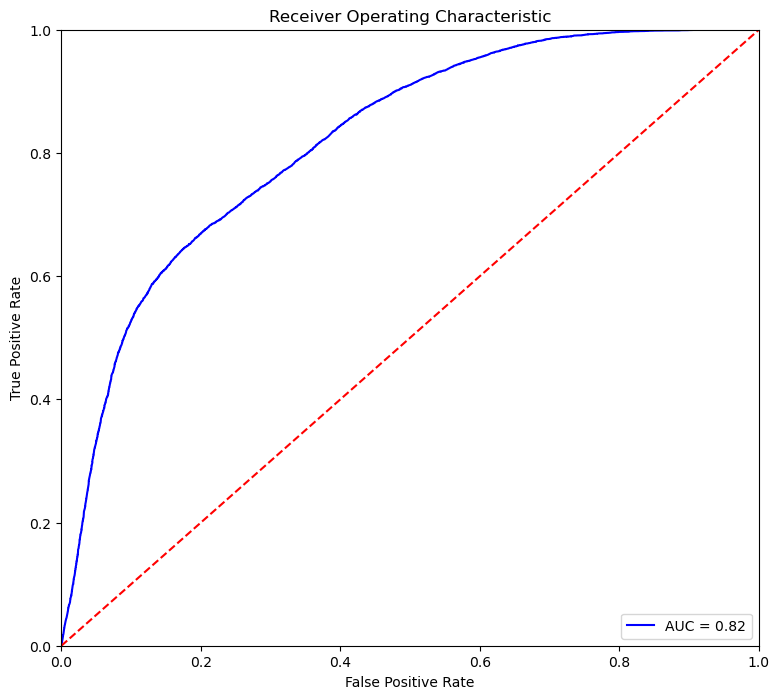

In [60]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pre_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds}).sort_values(by = ['Threshold']).reset_index(drop=True)

TPR       FPR  Threshold
0      1.000000  1.000000   0.000000
1      1.000000  0.992083   0.001394
2      1.000000  0.991959   0.001429
3      1.000000  0.991929   0.001667
4      1.000000  0.991836   0.001818
...         ...       ...        ...
11601  0.013345  0.002095   0.998182
11602  0.013012  0.002095   0.998333
11603  0.012900  0.002064   0.998889
11604  0.012900  0.002033   1.000000
11605  0.000000  0.000000   2.000000

[11606 rows x 3 columns]